# Random Forests for Diagnosis

For this project, I'll load the breast cancer diagnosis dataset and use this data to train and test 1) a decision tree classifier, and then 2) a random forest classifier using the scikit-learn classes, ```DecisionTreeClassifier``` and ```RandomForestClassifier``` respectively. Subsequently, I'll then compare and contrast the results using classifier evaluation methods in ```sklearn.metrics```.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics

# Load the breast cancer diagnosis dataset
breast_cancer = datasets.load_breast_cancer()
print(breast_cancer.DESCR)

X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# Separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [2]:
#DECISION TREE
# Create Decision Tree Classifier "clf"
clf = DecisionTreeClassifier()

# Train "clf"
clf = clf.fit(X_train, y_train)

# Get predictions for given test dataset
y_pred = clf.predict(X_test)

In [3]:
# RANDOM FOREST
# Create a Gaussian classifier
clf_forest = RandomForestClassifier(n_estimators=100)

# Train "clf_forest"
clf_forest = clf_forest.fit(X_train, y_train)

# Get predictions for given test dataset
y_forest_pred= clf_forest.predict(X_test)

In [4]:
# Evaluate accuracy of both models
print("Accuracy Our Decision Tree Classifier:", metrics.accuracy_score(y_test, y_pred))


print("Accuracy Our Random Forest Classifier:", metrics.accuracy_score(y_test, y_forest_pred))

Accuracy Our Decision Tree Classifier: 0.9064327485380117
Accuracy Our Random Forest Classifier: 0.935672514619883


## Evaluate feature importance
I'll now evaluate the importance of how much each feature contributes towards the model performance with the method  ```feature_importance```

Additionally, I'll calculate and print a sorted list of all the features used above. Then, I'll select the top 10 features and use these to train and test a new classifier, and evaluate the result.


In [5]:
import pandas as pd
# Gett list of feature importance as a dataframe
feature_imp = pd.Series(clf_forest.feature_importances_,index=feature_names).sort_values(ascending=False)

# List important features based on their contribution to model performance
feature_imp

worst area                 0.158066
worst perimeter            0.129193
worst radius               0.114380
worst concave points       0.110881
mean concave points        0.080660
mean area                  0.079627
mean perimeter             0.054505
mean concavity             0.047743
mean radius                0.039752
worst concavity            0.033992
area error                 0.021242
worst texture              0.014796
radius error               0.013919
worst smoothness           0.010881
mean texture               0.010793
worst symmetry             0.009251
worst compactness          0.009205
perimeter error            0.006827
worst fractal dimension    0.006716
texture error              0.005165
mean compactness           0.005075
mean smoothness            0.004972
fractal dimension error    0.004916
compactness error          0.004370
concavity error            0.004139
symmetry error             0.004126
concave points error       0.004085
mean symmetry              0

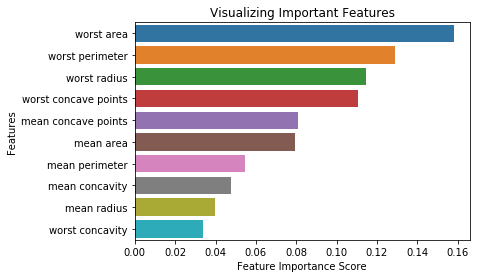

In [6]:
# Check top 10 most important features with a visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[0:10], y=feature_imp[0:10].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Training a new Random Forest classifier with selected top 10 features


In [7]:
# To better visualize new dataset to create, let's bring the original dataset to a pandas dataframe format
df3 = pd.DataFrame(np.c_[X, y], columns=np.append(feature_names, ['target']))
df3.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
# Get the names of top 10 features
new_features_list= feature_imp[0:10].index.values.tolist()
new_features_list

['worst area',
 'worst perimeter',
 'worst radius',
 'worst concave points',
 'mean concave points',
 'mean area',
 'mean perimeter',
 'mean concavity',
 'mean radius',
 'worst concavity']

In [9]:
# Generate the data set including only the top 10 features we previously selected
X2 = df3[new_features_list]
y2 = df3['target']

# Split new dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=4)

In [10]:
# RANDOM FOREST TRAINING WITH TOP 10 FEATURES
# Create a Gaussian classifier
clf_forest2 = RandomForestClassifier(n_estimators=100)

# Train "clf_forest2"
clf_forest2 = clf_forest2.fit(X2_train, y2_train)

# Predict responses for given test dataset
y2_forest_pred= clf_forest2.predict(X2_test)

# Evaluate model accuracy
print("Accuracy Our Random Forest Classifier:", metrics.accuracy_score(y2_test, y2_forest_pred))

Accuracy Our Random Forest Classifier: 0.935672514619883


#### We see that the accuracy of the new classsifier is less than the previos one. This could be explained by the fact that by selecting only top 10 features, we leave out other features which helped to initially get a higher accuracy